In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [2]:
class logistic_regression:
    '''This class will perform logistic regression classification'''
    '''Sigmoid activation is used is this class'''
    
    def __init__(self, threshold=0.5, lr=0.01, iters=1000):
        self.threshold = threshold
        self.lr = lr
        self.iters = iters
        self.loss = []
        self.accuracy = []
        
    def forward_prop(self, X, y):
        # This function will perform one pass of forward propogation
        self.Z = np.dot(X, self.W.T) + self.b
        self.A = 1 / (1 + np.exp(-self.Z))
        
        #Convert based on threshhold
        mask0 = self.A<self.threshold
        mask1 = self.A>self.threshold
        self.yhat = self.A.copy()
        self.yhat[mask0] = 0
        self.yhat[mask1] = 1
        
        # Add each accuracy to a list for plotting
        self.accuracy.append((1 - abs(np.sum(y - self.Z)/len(y))) * 100)
    
    def back_prop(self, X, y):
        # This function will perform one pass of backward propogation
        y = y.reshape(X.shape[0],1)
        m, _ = X.shape
        self.J = -np.sum((y*np.log(self.A)) + ((1 - y)*np.log(1 - self.A)))/m #loss function
        
        # Add each accuracy to a list for plotting
        self.loss.append(self.J)
        
        self.dZ = y - self.A                   # dJ/dZ = dJ/dA * dA/dZ
        self.dW = np.dot(self.dZ.T, X)/m       # dJ/dW = X * dJ/dZ
        self.db = (np.sum(self.dZ))/m          # dJ/db = sum of dJ/dZ
        
        # Change W and b each time this function is run
        self.W += self.lr * self.dW
        self.b += self.lr * self.db

    def fit(self, X, y):
        # This function will repeat forward and backward propogation many times
        self.W = np.zeros((1, X.shape[1]))
        self.b = 1
        y = y.reshape(X.shape[0],1)
        
        for _ in range(self.iters):
            self.forward_prop(X, y)
            self.back_prop(X, y)
        
        print("Forward and backward propogation competed for {} iterations!".format(self.iters))
        print("Weights \n", self.W)
        print("Intercept \n", self.b)
        
    def predict(self, test_X):
        # This function can be used for prediction after training
        pred = np.array(np.dot(test_X, self.W.T) + self.b)
        
        #Convert based on threshhold
        mask0 = pred <= self.threshold
        mask1 = pred > self.threshold
        yhat = pred.copy()
        yhat[mask0] = 0
        yhat[mask1] = 1
        return yhat
    
    def show_plot(self):
        # This function is used to plot the learning history
        plt.figure(figsize=(15,5))
        print("Model Performance Plots")
        
        # Subplot for loss vs number of iterations
        plt.subplot(1,2,1)
        plt.grid(axis='both')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        sns.lineplot(x=range(self.iters), y=self.loss)
        
        # Subplot for accuracy vs number of iterations
        plt.subplot(1,2,2)
        plt.grid(axis='both')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        sns.lineplot(x=range(self.iters), y=self.accuracy)
        plt.show()

In [3]:
#Generate a toy dataset to check the algorithm

half_m = 20 # half the number of samples
n = 5 # number of features


x1 = np.random.rand(half_m,n+1)
x1[:,0] *= 3
x1[:, -1] = 1

x2 = np.random.randn(half_m,n+1)
x2[:, -1] = 0

Xt = np.vstack((x1, x2))

In [4]:
# Shuffle the toy dataset
np.random.shuffle(Xt)
Xt[:10]

array([[-0.03928282, -1.1680935 ,  0.52327666, -0.17154633,  0.77179055,
         0.        ],
       [ 0.6692449 ,  0.95274901,  0.44712538,  0.84640867,  0.69947928,
         1.        ],
       [ 2.38314477,  0.94447949, -0.91282223,  1.11701629, -1.31590741,
         0.        ],
       [-0.35399391, -1.37495129, -0.6436184 , -2.22340315,  0.62523145,
         0.        ],
       [ 0.79366684,  0.77423369,  0.45615033,  0.56843395,  0.0187898 ,
         1.        ],
       [-0.67433266,  0.03183056, -0.63584608,  0.67643329,  0.57659082,
         0.        ],
       [ 0.64013153, -1.61695604, -0.02432612, -0.73803091,  0.2799246 ,
         0.        ],
       [ 1.69980436,  0.26538949,  0.52324805,  0.09394051,  0.5759465 ,
         1.        ],
       [-1.10438334,  0.05216508, -0.739563  ,  1.5430146 , -1.29285691,
         0.        ],
       [-1.270485  ,  0.96939671, -1.17312341,  1.94362119, -0.41361898,
         0.        ]])

In [5]:
# Separate the features and labels

X0 = Xt[:,:-1] # m samples with n features
y0 = Xt[:,-1] # binary label for m samples

In [6]:
lr = logistic_regression(lr=0.008, iters=700)

In [7]:
lr.fit(X0, y0)

Forward and backward propogation competed for 700 iterations!
Weights 
 [[ 0.3289034  -0.05296493  0.54218844  0.0550199   0.35435331]]
Intercept 
 0.05496736100137673


In [8]:
test= np.vstack((X0[3], X0[4]))
lr.predict(test)

array([[0.],
       [1.]])

Model Performance Plots


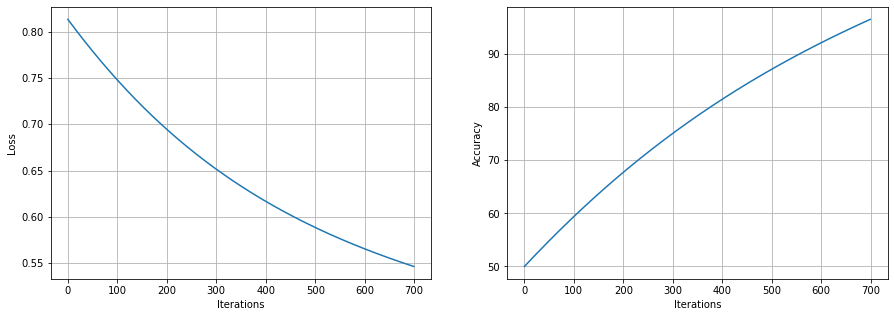

In [9]:
lr.show_plot()

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, scale=1.0, shuffle=True, random_state=7)

In [12]:
X.shape

(100, 4)

In [13]:
y.shape

(100,)

In [14]:
y

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [15]:
lor = logistic_regression(iters=1000)

In [16]:
lor.fit(X, y)

Forward and backward propogation competed for 1000 iterations!
Weights 
 [[ 0.70971489 -0.63405747  0.50574719  1.23669385]]
Intercept 
 0.30240790097377684


Model Performance Plots


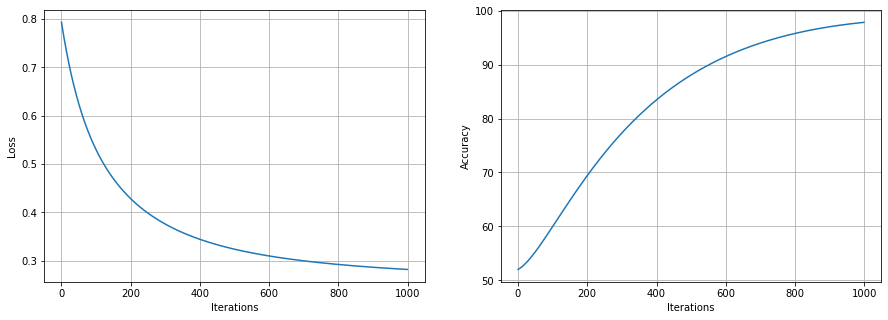

In [17]:
lor.show_plot()